In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

plt.style.use('ggplot')

# 3.2 Getting data

In [2]:
df = pd.read_csv('telco.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.head().T

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [4]:
df.columns = df.columns.str.lower().str.replace(" ","_")

categorical_columns = list(df.dtypes[df.dtypes=='object'].index)

for c in categorical_columns:
    df[c] = df[c].str.lower().str.replace(" ","_")

In [5]:
df.head().T

,0,1,2,3,4
customerid,7590-vhveg,5575-gnvde,3668-qpybk,7795-cfocw,9237-hqitu
gender,female,male,male,male,female
seniorcitizen,0,0,0,0,0
partner,yes,no,no,no,no
dependents,no,no,no,no,no
tenure,1,34,2,45,2
phoneservice,no,yes,yes,no,yes
multiplelines,no_phone_service,no,no,no_phone_service,no
internetservice,dsl,dsl,dsl,dsl,fiber_optic
onlinesecurity,no,yes,yes,yes,no


In [6]:
tc = pd.to_numeric(df.totalcharges, errors = 'coerce') #coerce means ignore

In [7]:
df.totalcharges = pd.to_numeric(df.totalcharges, errors = 'coerce') #coerce means ignore

In [8]:
df.totalcharges = df.totalcharges.fillna(0)

In [9]:
#chrun variable

df.churn = (df.churn == 'yes').astype(int)

# 3.3 Setting the validation framework

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
df_full_train, df_test = train_test_split(df, test_size=0.2,random_state=42)

In [12]:
len(df_full_train), len(df_test)

(5634, 1409)

In [13]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25,random_state=42)

In [14]:
len(df_train), len(df_val), len(df_test)

(4225, 1409, 1409)

In [15]:
df_train = df_train.reset_index(drop = True)
df_test = df_test.reset_index(drop = True)
df_val = df_test.reset_index(drop = True)

In [16]:
y_train = df_train.churn.values
y_test = df_test.churn.values
y_val = df_val.churn.values

In [17]:
del df_train['churn']
del df_test['churn']
del df_val['churn']

# 3.4 EDA

In [18]:
df_full_train = df_full_train.reset_index(drop=True)

In [19]:
df_full_train.churn.value_counts(normalize=True)

churn
0    0.734469
1    0.265531
Name: proportion, dtype: float64

In [20]:
global_churn_rate = df_full_train.churn.mean()
round(global_churn_rate,2)

0.27

In [21]:
numerical = ['tenure','monthlycharges','totalcharges']
categorical = ['gender', 'seniorcitizen', 'partner', 'dependents',
        'phoneservice', 'multiplelines', 'internetservice',
       'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport',
       'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling',
       'paymentmethod']

In [22]:
df_full_train[categorical].nunique()

gender              2
seniorcitizen       2
partner             2
dependents          2
phoneservice        2
multiplelines       3
internetservice     3
onlinesecurity      3
onlinebackup        3
deviceprotection    3
techsupport         3
streamingtv         3
streamingmovies     3
contract            3
paperlessbilling    2
paymentmethod       4
dtype: int64

# 3.5 Feature importance: Churn rate and risk ratio

In [23]:
df_full_train.head()

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,...,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.80,0
1,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.45,0
2,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.45,1
3,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.95,1
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,0.00,0


### Exploring churn variable

In [24]:
global_churn_rate

0.2655307064252751

##### 1. Churn by gender

In [25]:
churn_feamle = df_full_train[df_full_train['gender']=='female'].churn.mean()
churn_feamle

0.2708409173643975

In [26]:
chrun_male = df_full_train[df_full_train['gender']=='male'].churn.mean()
chrun_male

0.26047800484932454

##### 2. Churn by partner

In [27]:
churn_partner = df_full_train[df_full_train['partner']=='yes'].churn.mean()
churn_partner

0.20073260073260074

In [28]:
churn_no_partner = df_full_train[df_full_train['partner']=='no'].churn.mean()
churn_no_partner

0.32644628099173556

### Feature importance methods
1. Difference btw global churn vs group
2. Risk ratio = group / global
    
    If >1, more likely to churn

In [29]:
global_churn_rate - churn_partner

0.06479810569267436

In [30]:
global_churn_rate - churn_partner

0.06479810569267436

### Risk ratio

In [31]:
churn_partner / global_churn_rate

0.7559675618499149

In [32]:
churn_no_partner / global_churn_rate
#more likely to churn since it is higher than 1

1.2294106598311754

select 
    gender,
    avg(churn),
    avg(churn) - global_churn as diff,
    avg(churn) / global_churn as ratio
from 
    data
group by gender

In [33]:

df_group = df_full_train.groupby('gender').churn.agg(['mean','count'])
df_group['diff'] = df_group['mean'] - global_churn_rate
df_group['risk'] = df_group['mean'] / global_churn_rate

df_group

,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971


In [34]:
from IPython.display import display

In [35]:
for c in categorical:
    print(c)
    df_group = df_full_train.groupby(c).churn.agg(['mean','count'])
    df_group['diff'] = df_group['mean'] - global_churn_rate
    df_group['risk'] = df_group['mean'] / global_churn_rate

    display(df_group)



gender


,mean,count,diff,risk
gender,,,,
female,0.270841,2747,0.005310,1.019998
male,0.260478,2887,-0.005053,0.980971


seniorcitizen


,mean,count,diff,risk
seniorcitizen,,,,
0,0.237098,4728,-0.028433,0.892922
1,0.413907,906,0.148377,1.558793


partner


,mean,count,diff,risk
partner,,,,
no,0.326446,2904,0.060916,1.229411
yes,0.200733,2730,-0.064798,0.755968


dependents


,mean,count,diff,risk
dependents,,,,
no,0.312326,3951,0.046795,1.176233
yes,0.155674,1683,-0.109856,0.586276


phoneservice


,mean,count,diff,risk
phoneservice,,,,
no,0.253623,552,-0.011908,0.955156
yes,0.266824,5082,0.001293,1.004871


multiplelines


,mean,count,diff,risk
multiplelines,,,,
no,0.251397,2685,-0.014134,0.946771
no_phone_service,0.253623,552,-0.011908,0.955156
yes,0.284105,2397,0.018574,1.069952


internetservice


,mean,count,diff,risk
internetservice,,,,
dsl,0.191851,1939,-0.073679,0.722521
fiber_optic,0.415558,2481,0.150028,1.565010
no,0.076606,1214,-0.188924,0.288502


onlinesecurity


,mean,count,diff,risk
onlinesecurity,,,,
no,0.416014,2810,0.150484,1.566727
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.145342,1610,-0.120189,0.547363


onlinebackup


,mean,count,diff,risk
onlinebackup,,,,
no,0.398693,2448,0.133162,1.501494
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.216531,1972,-0.048999,0.815467


deviceprotection


,mean,count,diff,risk
deviceprotection,,,,
no,0.387706,2489,0.122175,1.460117
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.226825,1931,-0.038705,0.854234


techsupport


,mean,count,diff,risk
techsupport,,,,
no,0.413472,2791,0.147941,1.557153
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.152855,1629,-0.112676,0.575657


streamingtv


,mean,count,diff,risk
streamingtv,,,,
no,0.335418,2239,0.069887,1.263197
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.298945,2181,0.033415,1.125841


streamingmovies


,mean,count,diff,risk
streamingmovies,,,,
no,0.333333,2223,0.067803,1.255348
no_internet_service,0.076606,1214,-0.188924,0.288502
yes,0.301320,2197,0.035789,1.134784


contract


,mean,count,diff,risk
contract,,,,
month-to-month,0.426533,3083,0.161002,1.606340
one_year,0.117987,1212,-0.147544,0.444343
two_year,0.028379,1339,-0.237151,0.106878


paperlessbilling


,mean,count,diff,risk
paperlessbilling,,,,
no,0.16414,2309,-0.101390,0.618159
yes,0.33594,3325,0.070409,1.265164


paymentmethod


,mean,count,diff,risk
paymentmethod,,,,
bank_transfer_(automatic),0.174475,1238,-0.091056,0.657080
credit_card_(automatic),0.152404,1227,-0.113126,0.573961
electronic_check,0.449921,1887,0.184390,1.694420
mailed_check,0.190328,1282,-0.075203,0.716782


# 3.6 Feature Importance: Mutual information

Mutual information: concept from information therory, it tells us how much we can learn about one variable if we know the value of another

In [36]:
from sklearn.metrics import mutual_info_score

In [37]:
round(mutual_info_score(df_full_train.churn, df_full_train.contract),4)

0.0967

In [38]:
round(mutual_info_score(df_full_train.churn, df_full_train.gender),4)

0.0001

In [39]:
def mutual_info_churn_score(series):
    return mutual_info_score(series, df_full_train.churn)

In [40]:
mi = df_full_train[categorical].apply(mutual_info_churn_score)

mi.sort_values()

phoneservice        0.000040
gender              0.000069
multiplelines       0.000654
seniorcitizen       0.010059
partner             0.010227
dependents          0.014129
paperlessbilling    0.019077
streamingmovies     0.030705
streamingtv         0.030844
deviceprotection    0.042007
paymentmethod       0.042861
onlinebackup        0.045424
internetservice     0.053313
techsupport         0.060935
onlinesecurity      0.063393
contract            0.096652
dtype: float64

# 3.7 Feature Importance: Correlation

In [41]:
df_full_train.tenure.max()

72

In [42]:
df_full_train[numerical].dtypes

tenure              int64
monthlycharges    float64
totalcharges      float64
dtype: object

In [43]:
df_full_train[numerical].corrwith(df_full_train.churn)

tenure           -0.344925
monthlycharges    0.188574
totalcharges     -0.193370
dtype: float64

When tenure increase, they are less likely to churn

When monthly charges are higher, customers are more likely to leave

In [44]:
df_full_train[df_full_train.tenure <= 2]['churn'].mean()

0.5863636363636363

In [45]:
df_full_train[(df_full_train.tenure > 2) & (df_full_train.tenure <12)]['churn'].mean()

0.4121827411167513

In [46]:
df_full_train[df_full_train.tenure > 12]['churn'].mean()

0.17205957883923986

Monthly charges

In [47]:
df_full_train[df_full_train.monthlycharges <= 20]['churn'].mean()

0.0912621359223301

In [48]:
df_full_train[(df_full_train.monthlycharges > 20) & (df_full_train.monthlycharges <=50)]['churn'].mean()

0.19062027231467474

In [49]:
df_full_train[df_full_train.monthlycharges > 50]['churn'].mean()

0.3152488806952857

# 3.8 One hot encoding

Use scikit learn to encode categorical features

![encoding](1.png)

In [50]:
from sklearn.feature_extraction import DictVectorizer

In [51]:
dv = DictVectorizer(sparse=False)

train_dicts = df_train[categorical + numerical].to_dict(orient = 'records')
X_train = dv.fit_transform(train_dicts)

In [52]:
X_train.shape

(4225, 45)

In [53]:
X_train.shape

(4225, 45)

In [54]:
val_dicts = df_val[categorical + numerical].to_dict(orient = 'records')

In [55]:
X_val = dv.transform(val_dicts)

# 3.9 Logistic Regression

![lr](2.png)

Logistic regression is similar to linear regression

We take sigmoid of w0 + wx (from linear regression)

sigmoid = 1/ (1+exp(-z))

![sigmoid](sigmoid.png)

In [56]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [57]:
z = np.linspace(-5,5,51)
z

array([-5. , -4.8, -4.6, -4.4, -4.2, -4. , -3.8, -3.6, -3.4, -3.2, -3. ,
       -2.8, -2.6, -2.4, -2.2, -2. , -1.8, -1.6, -1.4, -1.2, -1. , -0.8,
       -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ,  1.2,  1.4,
        1.6,  1.8,  2. ,  2.2,  2.4,  2.6,  2.8,  3. ,  3.2,  3.4,  3.6,
        3.8,  4. ,  4.2,  4.4,  4.6,  4.8,  5. ])

In [58]:
sigmoid(z)

array([0.00669285, 0.00816257, 0.0099518 , 0.01212843, 0.01477403,
       0.01798621, 0.02188127, 0.02659699, 0.03229546, 0.03916572,
       0.04742587, 0.05732418, 0.06913842, 0.0831727 , 0.09975049,
       0.11920292, 0.14185106, 0.16798161, 0.19781611, 0.23147522,
       0.26894142, 0.31002552, 0.35434369, 0.40131234, 0.450166  ,
       0.5       , 0.549834  , 0.59868766, 0.64565631, 0.68997448,
       0.73105858, 0.76852478, 0.80218389, 0.83201839, 0.85814894,
       0.88079708, 0.90024951, 0.9168273 , 0.93086158, 0.94267582,
       0.95257413, 0.96083428, 0.96770454, 0.97340301, 0.97811873,
       0.98201379, 0.98522597, 0.98787157, 0.9900482 , 0.99183743,
       0.99330715])

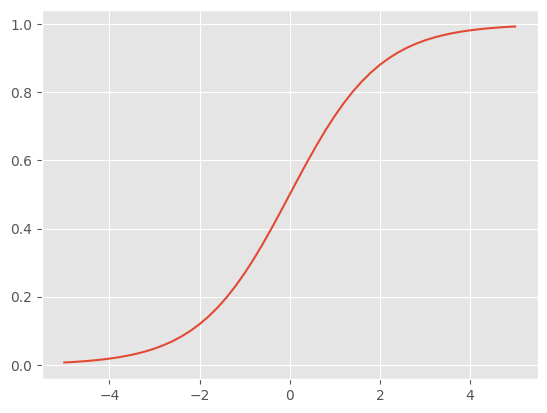

In [59]:
plt.plot(z, sigmoid(z))

In [60]:
def linear_regression(xi):
    ressult = w0

    for j in range(len(w)):
        result = result + xi[j] * w[j]

    return result

In [61]:
def logistic_regression(xi):
    score = w0

    for j in range(len(w)):
        score = score + xi[j] * w[j]

    result = sigmoid(score)
    return score
    

# 3.10 Training logistic regression with Scikit-Learn

- Train a model with scikit learn
- apply it to the validation dataset
- calculate the accuracy


In [62]:
from sklearn.linear_model import LogisticRegression, ridge_regression

In [63]:
model = LogisticRegression()

model.fit(X_train, y_train)

LogisticRegression()

In [64]:
model.intercept_[0]

-0.12872052705562337

In [65]:
model.coef_[0].round(3)

array([ 0.55 , -0.207, -0.47 , -0.052, -0.075,  0.035, -0.114, -0.048,
        0.027, -0.154, -0.305,  0.293, -0.114,  0.002, -0.215,  0.123,
       -0.036,  0.088, -0.114, -0.1  ,  0.238, -0.114, -0.25 , -0.234,
        0.107, -0.104, -0.023, -0.112, -0.181,  0.255, -0.088,  0.123,
       -0.25 ,  0.176, -0.151, -0.114,  0.138, -0.066, -0.114,  0.054,
        0.202, -0.114, -0.214, -0.059,  0.   ])

In [66]:
model.predict_proba(X_train)
#why 2 columns? first one ->prob of being negative class, second -> prob of being positive class

array([[0.83138161, 0.16861839],
       [0.86926753, 0.13073247],
       [0.8090871 , 0.1909129 ],
       ...,
       [0.72160386, 0.27839614],
       [0.98855933, 0.01144067],
       [0.91813428, 0.08186572]])

![prob](predict_proba.png)

In [67]:
y_pred = model.predict_proba(X_train)[:,1]
y_pred

array([0.16861839, 0.13073247, 0.1909129 , ..., 0.27839614, 0.01144067,
       0.08186572])

In [68]:
y_pred = model.predict_proba(X_val)[:,1]
y_pred

array([0.73520967, 0.04451782, 0.00670607, ..., 0.04439032, 0.02050197,
       0.5550173 ])

In [69]:
churn_decision = (y_pred >= 0.5)
churn_decision

array([ True, False, False, ..., False, False,  True])

In [70]:
df_val[churn_decision].customerid

0       1024-guald
3       6910-hadcm
13      5914-dvbwj
15      6328-zpbgn
17      1853-udxbw
           ...    
1394    1197-bvmvg
1398    8260-ngfny
1399    7074-ievoj
1401    8473-vuvjn
1408    5868-czjdr
Name: customerid, Length: 334, dtype: object

performance of model
using accuracy

In [71]:
(y_val == churn_decision).mean()

#81 % accuracy

0.8161816891412349

In [72]:
df_pred = pd.DataFrame()
df_pred['probability'] = y_pred
df_pred['prediction'] = churn_decision.astype(int)
df_pred['actual'] = y_val


In [73]:
df_pred

,probability,prediction,actual
0,0.735210,1,1
1,0.044518,0,0
2,0.006706,0,0
3,0.628414,1,1
4,0.006672,0,0
...,...,...,...
1404,0.021590,0,0
1405,0.079168,0,0
1406,0.044390,0,0
1407,0.020502,0,0


In [74]:
df_pred['correct'] = df_pred.prediction == df_pred.actual

In [75]:
df_pred

,probability,prediction,actual,correct
0,0.735210,1,1,True
1,0.044518,0,0,True
2,0.006706,0,0,True
3,0.628414,1,1,True
4,0.006672,0,0,True
...,...,...,...,...
1404,0.021590,0,0,True
1405,0.079168,0,0,True
1406,0.044390,0,0,True
1407,0.020502,0,0,True


In [76]:
df_pred.correct.mean()

0.8161816891412349

# 3.11 Model Interpretation

In [77]:
dict(zip(dv.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.55,
 'contract=one_year': -0.207,
 'contract=two_year': -0.47,
 'dependents=no': -0.052,
 'dependents=yes': -0.075,
 'deviceprotection=no': 0.035,
 'deviceprotection=no_internet_service': -0.114,
 'deviceprotection=yes': -0.048,
 'gender=female': 0.027,
 'gender=male': -0.154,
 'internetservice=dsl': -0.305,
 'internetservice=fiber_optic': 0.293,
 'internetservice=no': -0.114,
 'monthlycharges': 0.002,
 'multiplelines=no': -0.215,
 'multiplelines=no_phone_service': 0.123,
 'multiplelines=yes': -0.036,
 'onlinebackup=no': 0.088,
 'onlinebackup=no_internet_service': -0.114,
 'onlinebackup=yes': -0.1,
 'onlinesecurity=no': 0.238,
 'onlinesecurity=no_internet_service': -0.114,
 'onlinesecurity=yes': -0.25,
 'paperlessbilling=no': -0.234,
 'paperlessbilling=yes': 0.107,
 'partner=no': -0.104,
 'partner=yes': -0.023,
 'paymentmethod=bank_transfer_(automatic)': -0.112,
 'paymentmethod=credit_card_(automatic)': -0.181,
 'paymentmethod=electronic_check': 0.255,
 'p

### training a smaller model/

In [78]:
small =['contract', 'tenure','monthlycharges']

In [79]:
df_train[small].iloc[:10].to_dict(orient = 'records')

[{'contract': 'month-to-month', 'tenure': 3, 'monthlycharges': 19.85},
 {'contract': 'one_year', 'tenure': 55, 'monthlycharges': 103.7},
 {'contract': 'month-to-month', 'tenure': 24, 'monthlycharges': 49.7},
 {'contract': 'month-to-month', 'tenure': 1, 'monthlycharges': 20.2},
 {'contract': 'two_year', 'tenure': 61, 'monthlycharges': 62.15},
 {'contract': 'two_year', 'tenure': 42, 'monthlycharges': 20.7},
 {'contract': 'month-to-month', 'tenure': 23, 'monthlycharges': 54.15},
 {'contract': 'month-to-month', 'tenure': 37, 'monthlycharges': 98.8},
 {'contract': 'one_year', 'tenure': 43, 'monthlycharges': 20.0},
 {'contract': 'month-to-month', 'tenure': 20, 'monthlycharges': 73.65}]

In [80]:
dicts_train_Small = df_train[small].to_dict(orient = 'records')
dicts_val_Small = df_val[small].to_dict(orient = 'records')


In [81]:
dv_small = DictVectorizer(sparse = False)
dv_small.fit(dicts_train_Small)

DictVectorizer(sparse=False)

In [82]:
dv_small.get_feature_names_out()

array(['contract=month-to-month', 'contract=one_year',
       'contract=two_year', 'monthlycharges', 'tenure'], dtype=object)

In [83]:
X_train_small = dv_small.transform(dicts_train_Small)

In [84]:
model_small = LogisticRegression()
model_small.fit(X_train_small, y_train)

LogisticRegression()

In [85]:
w0 = model_small.intercept_[0]
w0

-2.5621301551131817

In [86]:
w= model_small.coef_[0]
w.round(3)

array([ 1.063, -0.029, -1.035,  0.027, -0.036])

In [87]:
dict(zip(dv_small.get_feature_names_out(), model.coef_[0].round(3)))

{'contract=month-to-month': 0.55,
 'contract=one_year': -0.207,
 'contract=two_year': -0.47,
 'monthlycharges': -0.052,
 'tenure': -0.075}

# 3.12 Using the model


In [88]:
df_full_train

,customerid,gender,seniorcitizen,partner,dependents,tenure,phoneservice,multiplelines,internetservice,onlinesecurity,...,deviceprotection,techsupport,streamingtv,streamingmovies,contract,paperlessbilling,paymentmethod,monthlycharges,totalcharges,churn
0,4223-bkeor,female,0,no,yes,21,yes,no,dsl,yes,...,yes,no,no,yes,one_year,no,mailed_check,64.85,1336.80,0
1,6035-riiom,female,0,no,no,54,yes,yes,fiber_optic,no,...,no,no,yes,yes,two_year,yes,bank_transfer_(automatic),97.20,5129.45,0
2,3797-vtidr,male,0,yes,no,1,no,no_phone_service,dsl,no,...,no,no,no,no,month-to-month,yes,electronic_check,23.45,23.45,1
3,2568-brgyx,male,0,no,no,4,yes,no,fiber_optic,no,...,no,no,no,no,month-to-month,yes,electronic_check,70.20,237.95,1
4,2775-sefee,male,0,no,yes,0,yes,yes,dsl,yes,...,no,yes,no,no,two_year,yes,bank_transfer_(automatic),61.90,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5629,0684-aosih,male,0,yes,no,1,yes,no,fiber_optic,yes,...,no,no,yes,yes,month-to-month,yes,electronic_check,95.00,95.00,1
5630,5982-psmkw,female,0,yes,yes,23,yes,yes,dsl,yes,...,yes,yes,yes,yes,two_year,yes,credit_card_(automatic),91.10,2198.30,0
5631,8044-bgwpi,male,0,yes,yes,12,yes,no,no,no_internet_service,...,no_internet_service,no_internet_service,no_internet_service,no_internet_service,month-to-month,yes,electronic_check,21.15,306.05,0
5632,7450-nwrtr,male,1,no,no,12,yes,yes,fiber_optic,no,...,yes,no,yes,yes,month-to-month,yes,electronic_check,99.45,1200.15,1


In [89]:
dicts_full_train = df_full_train[categorical + numerical].to_dict(orient = 'records')


In [90]:
dv = DictVectorizer(sparse = False)
 

In [91]:
y_full_train = df_full_train.churn.values

In [92]:
model = LogisticRegression()
model.fit(X_full_train, y_full_train)

NameError: name 'X_full_train' is not defined

In [ ]:
dicts_test = df_test[categorical + numerical].to_dict(orient = 'records')


In [ ]:
X_test = dv.transform(dicts_test)

In [ ]:
y_pred = model.predict_proba(X_test)[:,1]

In [ ]:
churn_decision = (y_pred >= 0.5)

In [ ]:
(churn_decision == y_test).mean()

0.8218594748048261

In [ ]:
customer  = dicts_test[0]
customer

{'gender': 'female',
 'seniorcitizen': 0,
 'partner': 'yes',
 'dependents': 'no',
 'phoneservice': 'no',
 'multiplelines': 'no_phone_service',
 'internetservice': 'dsl',
 'onlinesecurity': 'no',
 'onlinebackup': 'no',
 'deviceprotection': 'no',
 'techsupport': 'no',
 'streamingtv': 'no',
 'streamingmovies': 'no',
 'contract': 'month-to-month',
 'paperlessbilling': 'yes',
 'paymentmethod': 'electronic_check',
 'tenure': 1,
 'monthlycharges': 24.8,
 'totalcharges': 24.8}

In [ ]:
X_small = dv.transform([customer])

In [ ]:
model.predict_proba(X_small)

array([[0.30977355, 0.69022645]])

In [ ]:
y_test[0]

1